In [4]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn
import matplotlib.pyplot as plt
from scipy import stats 
%matplotlib inline

ForbesAmericasTopColleges2019 - рейтинг американских вузов. Школы ранжируются на основе заработной платы выпускников,
удовлетворенности студентов, долга, американских лидеров, уровня успеваемости выпускников, академических успехов и т.д.
Всего 11 параметров, давайте узнаем, моно ли их сделать еще меньше. 

In [5]:
df = pd.read_csv(r"./ForbesAmericasTopColleges2019.csv")._get_numeric_data()
print(df.shape)
df.head(100)

(650, 12)


,Rank,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper
0,1.0,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0
1,2.0,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0
2,3.0,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0
3,4.0,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0
4,5.0,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96.0,3869.0,5721.0,31138.0,35487.0,70943.0,113200.0,34.0,1280.0,1470.0,29.0,33.0
96,97.0,2884.0,6330.0,36306.0,26972.0,60525.0,112800.0,63.0,1160.0,1420.0,23.0,29.0
97,98.0,45796.0,51848.0,17396.0,8760.0,39655.0,104000.0,50.0,1270.0,1480.0,26.0,31.0
98,99.0,30690.0,37606.0,14625.0,10076.0,44978.0,100700.0,54.0,1200.0,1370.0,26.0,31.0


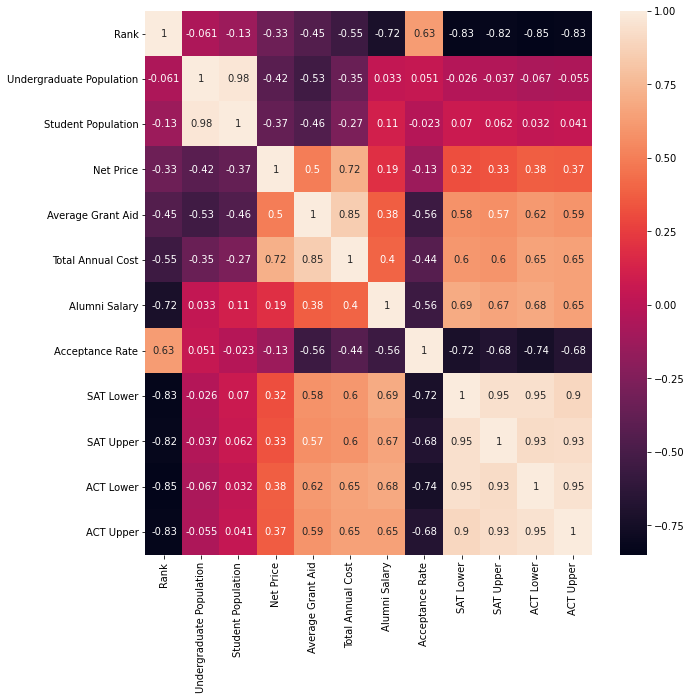

In [6]:
import seaborn as sns

Var_Corr = df.corr()
# plot the heatmap and annotation on it
plt.figure(figsize=(10,10))
# с подписями
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True )

# без подписей
#sns.heatmap(Var_Corr, annot=False, xticklabels=[], yticklabels=[] )

In [7]:
import math
from sklearn import preprocessing 

def scale_features (df):
    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame (scaled, columns=df.columns)
    return scaled

In [8]:
scaled_df = scale_features(df)

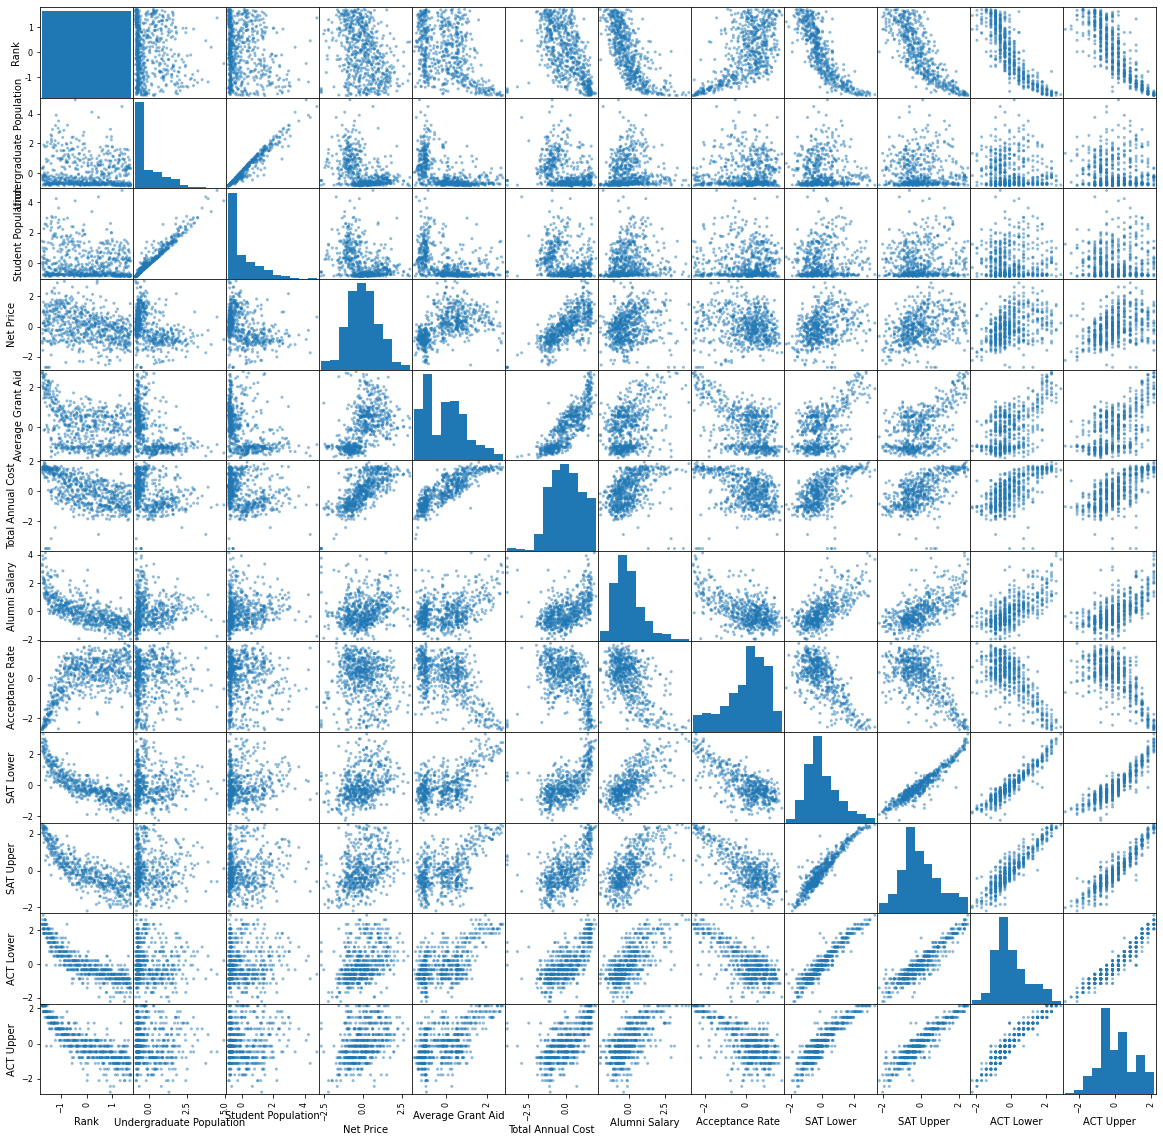

In [9]:
_=pd.plotting.scatter_matrix(scaled_df, figsize=(20,20))

In [10]:
scaled_df.isna().sum()
#цифры означаю количество Nan

Rank                         0
Undergraduate Population     0
Student Population           0
Net Price                    2
Average Grant Aid            4
Total Annual Cost            0
Alumni Salary               15
Acceptance Rate              2
SAT Lower                   99
SAT Upper                   99
ACT Lower                   97
ACT Upper                   97
dtype: int64

In [11]:
scaled_df.dropna(subset = ['Net Price', "Average Grant Aid", 'Alumni Salary', "Acceptance Rate"])


,Rank,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper
0,-1.729388,0.344401,1.450648,-0.969313,2.671999,1.458412,3.347401,-2.571692,2.741205,2.484985,2.340754,2.146652
1,-1.724059,-0.143514,0.418665,-1.098314,2.695640,1.421251,3.235700,-2.571692,2.192737,2.044263,2.340754,2.146652
2,-1.718729,-0.315566,0.072291,-0.448954,2.763965,1.586318,2.753990,-2.480815,2.741205,2.396841,2.340754,2.146652
3,-1.713400,-0.477218,-0.042255,-0.189501,2.079013,1.294178,3.933831,-2.480815,2.976263,2.308697,2.609142,2.146652
4,-1.708071,-0.389444,-0.284793,-1.574382,2.512425,1.197303,2.830784,-2.526253,2.506147,2.308697,2.072365,2.146652
...,...,...,...,...,...,...,...,...,...,...,...,...
644,1.702741,-0.699389,-0.744651,1.523690,-0.242962,-0.121637,-0.010609,0.563563,-1.254780,-1.305226,-1.416683,-1.780887
645,1.708071,0.302711,0.183040,-1.659333,-0.935704,-1.181436,-0.150236,0.109179,-1.568191,-1.305226,-1.416683,-1.780887
646,1.713400,0.324856,0.132223,-1.128446,-0.961225,-1.316305,-0.925161,1.063387,-1.646543,-1.745948,-1.685071,-1.780887
647,1.718729,-0.798729,-0.820078,-0.362672,0.637920,-0.168788,-1.965376,0.472686,-0.957040,-1.217081,-1.148294,-1.126297


In [12]:
MyMatrix = scaled_df.dropna(subset = ['Net Price', "Average Grant Aid", 'Alumni Salary', "Acceptance Rate"])


In [13]:
MyMatrix.isna().sum()
#цифры означаю количество Nan

Rank                         0
Undergraduate Population     0
Student Population           0
Net Price                    0
Average Grant Aid            0
Total Annual Cost            0
Alumni Salary                0
Acceptance Rate              0
SAT Lower                   93
SAT Upper                   93
ACT Lower                   90
ACT Upper                   90
dtype: int64

In [14]:
MyMatrix.fillna(MyMatrix.mean())

,Rank,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper
0,-1.729388,0.344401,1.450648,-0.969313,2.671999,1.458412,3.347401,-2.571692,2.741205,2.484985,2.340754,2.146652
1,-1.724059,-0.143514,0.418665,-1.098314,2.695640,1.421251,3.235700,-2.571692,2.192737,2.044263,2.340754,2.146652
2,-1.718729,-0.315566,0.072291,-0.448954,2.763965,1.586318,2.753990,-2.480815,2.741205,2.396841,2.340754,2.146652
3,-1.713400,-0.477218,-0.042255,-0.189501,2.079013,1.294178,3.933831,-2.480815,2.976263,2.308697,2.609142,2.146652
4,-1.708071,-0.389444,-0.284793,-1.574382,2.512425,1.197303,2.830784,-2.526253,2.506147,2.308697,2.072365,2.146652
...,...,...,...,...,...,...,...,...,...,...,...,...
644,1.702741,-0.699389,-0.744651,1.523690,-0.242962,-0.121637,-0.010609,0.563563,-1.254780,-1.305226,-1.416683,-1.780887
645,1.708071,0.302711,0.183040,-1.659333,-0.935704,-1.181436,-0.150236,0.109179,-1.568191,-1.305226,-1.416683,-1.780887
646,1.713400,0.324856,0.132223,-1.128446,-0.961225,-1.316305,-0.925161,1.063387,-1.646543,-1.745948,-1.685071,-1.780887
647,1.718729,-0.798729,-0.820078,-0.362672,0.637920,-0.168788,-1.965376,0.472686,-0.957040,-1.217081,-1.148294,-1.126297


In [15]:
MyMatrix = MyMatrix.fillna(MyMatrix.mean())

In [16]:
from sklearn.decomposition import PCA

n = scaled_df.shape[1]

pca = PCA (n_components = n)
pca.fit(MyMatrix)

PCA(n_components=12)

In [17]:
pca.singular_values_

array([62.25424342, 40.48220382, 21.32779074, 18.18633744, 17.05323102,
       13.46017652, 11.44180143,  8.3608753 ,  6.3150795 ,  5.88902935,
        3.61988972,  3.2094193 ])

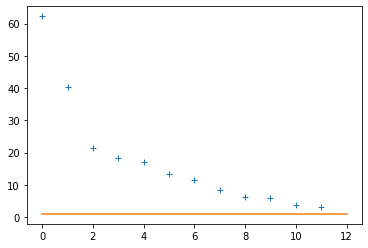

In [18]:
plt.plot(pca.singular_values_, '+')
plt.plot([0,n], [1,1])

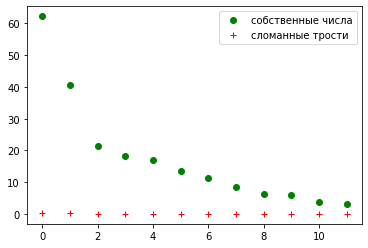

In [19]:
lis = [ sum(1/j for j in range(i, n+1)) / n for i in range(1, n + 1)]
lis = np.array(lis)

plt.plot(pca.singular_values_, 'go')
plt.plot(lis, 'r+')
plt.legend(['собственные числа' , 'сломанные трости'])

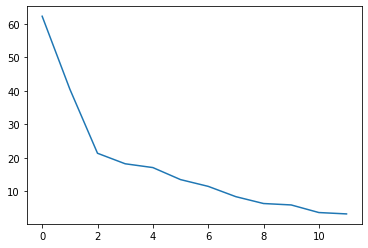

In [20]:
plt.plot(pca.singular_values_)

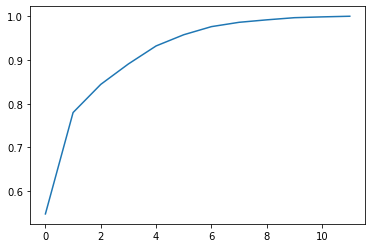

In [21]:
plt.plot(pca.explained_variance_ratio_.cumsum())


In [22]:
number_of_components = 6 # сколько берем компонент

factor_weights_values = pca.components_[:number_of_components]  # матрица, сами значения

# датафрейм с этой матрицей
factor_weights_df = pd.DataFrame(
        data={
            df.columns[i]:factor_weights_values[:,i] for i in range(number_of_components)
        })

In [23]:
factor_weights_df

,Rank,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost
0,-0.339120,-0.090340,-0.049232,0.206309,0.304387,0.320221
1,-0.162376,0.577839,0.584624,-0.296873,-0.283419,-0.194606
2,0.153858,-0.243161,-0.254228,-0.732309,0.111334,-0.296255
3,0.065151,0.230892,0.249251,-0.018842,0.463975,0.333544
4,-0.196185,-0.133706,-0.147043,-0.095427,-0.132245,-0.068216
5,-0.107346,-0.078345,-0.097516,0.445753,-0.502927,-0.290310


In [24]:
factor_weights_df.sum().abs().sort_values(ascending=False)

Rank                        0.586016
Net Price                   0.491389
Student Population          0.285857
Undergraduate Population    0.263178
Total Annual Cost           0.195621
Average Grant Aid           0.038895
dtype: float64

In [25]:
transformed_df = pca.transform(MyMatrix)

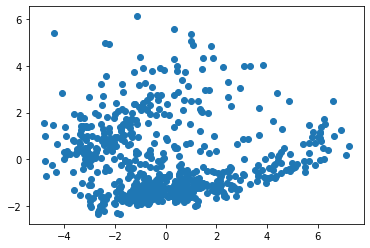

In [26]:
plt.scatter(transformed_df[:,0], transformed_df[:,1])

In [27]:
transformed_df_copy = transformed_df.copy() # скопируем, на всякий случай

transformed_df_copy[:, number_of_components:] = 0 # занулим те компоненты, которые не нужны

transformed_back_again_df = pca.inverse_transform(transformed_df_copy)  # трансофрмировали в обратное пространство признаков

# остаток
remainder = transformed_back_again_df - MyMatrix  # остаток это разница того что получилось после зануления и что было до

from scipy.linalg import norm

print(f'норма оригинальной матрицы {norm(MyMatrix)}')
print(f'норма остатка {norm(remainder)}') 

норма оригинальной матрицы 84.09852923220102
норма остатка 17.285367377333984


In [28]:
def accuracy_of_transorming(n_comp):
    transformed_df_copy = transformed_df.copy()
    transformed_df_copy[:, n_comp:] = 0
    transformed_back_again_df = pca.inverse_transform(transformed_df_copy)
    remainder = transformed_back_again_df - MyMatrix
    from scipy.linalg import norm
    return 1 - norm(remainder)/norm(transformed_df)
    
print(f'{accuracy_of_transorming(12):.2}')
print(f'{accuracy_of_transorming(9):.2}')
print(f'{accuracy_of_transorming(8):.2}')
print(f'{accuracy_of_transorming(7):.2}')
print(f'{accuracy_of_transorming(6):.2}')

1.0
0.91
0.88
0.85
0.79
